In [1]:
!ls

05-intro-to-pandas.ipynb
countries.csv
school-shootings-data.csv
sources.txt


In [125]:
import pandas as pd
%matplotlib inline

In [6]:
type(pd.read_csv("countries.csv"))

pandas.core.frame.DataFrame

In [13]:
# This table is a dataframe
# common practice is pull in all dataframes as "df"
df = pd.read_csv("countries.csv")

In [ ]:
# look at your data
df

In [68]:
# Look at just the first 5 rows
df.head() 

,Country,Continent,GDP_per_capita,life_expectancy,Population
0,Afghanistan,Asia,663,54.863,22856302
1,Albania,Europe,4195,74.200,3071856
2,Algeria,Africa,5098,68.963,30533827
3,Angola,Africa,2446,45.234,13926373
4,Antigua and Barbuda,N. America,12738,73.544,77656


In [15]:
# Look at just the last 5 rows
df.tail()

In [17]:
# Look at just the first or last X rows, number in parens
df.tail(11)

In [21]:
# Get total rows and columns
df.shape

(188, 5)

In [20]:
# Get your column types/names/labels
df.dtypes

Country             object
Continent           object
GDP_per_capita       int64
life_expectancy    float64
Population           int64
dtype: object

In [27]:
df.sort_values

<bound method DataFrame.sort_values of                     Country   Continent  GDP_per_capita  life_expectancy  \
0               Afghanistan        Asia             663           54.863   
1                   Albania      Europe            4195           74.200   
2                   Algeria      Africa            5098           68.963   
3                    Angola      Africa            2446           45.234   
4       Antigua and Barbuda  N. America           12738           73.544   
5                 Argentina  S. America           10571           73.822   
6                   Armenia      Europe            2114           71.494   
7                 Australia     Oceania           29241           79.930   
8                   Austria      Europe           32008           78.330   
9                Azerbaijan      Europe            2533           66.851   
10                  Bahamas  N. America           22728           72.370   
11                  Bahrain        Asia          

In [81]:
df.sort_index

<bound method DataFrame.sort_index of                     Country   Continent  GDP_per_capita  life_expectancy  \
0               Afghanistan        Asia             663           54.863   
1                   Albania      Europe            4195           74.200   
2                   Algeria      Africa            5098           68.963   
3                    Angola      Africa            2446           45.234   
4       Antigua and Barbuda  N. America           12738           73.544   
5                 Argentina  S. America           10571           73.822   
6                   Armenia      Europe            2114           71.494   
7                 Australia     Oceania           29241           79.930   
8                   Austria      Europe           32008           78.330   
9                Azerbaijan      Europe            2533           66.851   
10                  Bahamas  N. America           22728           72.370   
11                  Bahrain        Asia           

In [29]:
# Get GDP
df.sort_values(by='GDP_per_capita', ascending=False).head(5)

,Country,Continent,GDP_per_capita,life_expectancy,Population
99,Luxembourg,Europe,63924,77.820,435491
135,Qatar,Asia,60394,76.680,590957
23,Brunei,Asia,48020,75.927,327036
125,Norway,Europe,43174,78.760,4490859
178,United States,N. America,39758,76.800,282496310


In [37]:
# Get smallest 5 countries, descending
df.sort_values(by='Population', ascending=False).tail()

,Country,Continent,GDP_per_capita,life_expectancy,Population
169,Tonga,Oceania,4886,70.810,97935
87,Kiribati,Oceania,3501,64.642,84010
146,Seychelles,Africa,15230,71.771,78685
4,Antigua and Barbuda,N. America,12738,73.544,77656
64,Greenland,N. America,33204,67.030,56196


In [38]:
# Get smallest 5 countries, ascending
df.sort_values(by='Population', ascending=True).head()

,Country,Continent,GDP_per_capita,life_expectancy,Population
64,Greenland,N. America,33204,67.030,56196
4,Antigua and Barbuda,N. America,12738,73.544,77656
146,Seychelles,Africa,15230,71.771,78685
87,Kiribati,Oceania,3501,64.642,84010
169,Tonga,Oceania,4886,70.810,97935


In [48]:
# Get GDP
df['GDP_per_capita'].max()

63924

In [46]:
df['life_expectancy'].min()

38.12300000000001

In [49]:
# can drop brackets/quotes IF THERE ARE NO SPACES
df.life_expectancy.min()

38.12300000000001

In [71]:
df.Population.sum()

6115042358

In [55]:
# Get median
import statistics
df.life_expectancy.median()

70.04150000000001

In [70]:
df.life_expectancy.mean()

66.50153603526596

In [ ]:
# Lazy numbers:
df.life_expectancy.describe()

In [59]:
df.GDP_per_capita.describe()

count      188.000000
mean      9977.558511
std      11953.393378
min        292.000000
25%       1732.500000
50%       5290.500000
75%      12701.250000
max      63924.000000
Name: GDP_per_capita, dtype: float64

In [60]:
# lazy numbers for EVERYTHING 
# But note, it can't do anything with Countries & Continents. Those are categories.
df.describe()

,GDP_per_capita,life_expectancy,Population
count,188.000000,188.000000,1.880000e+02
mean,9977.558511,66.501536,3.252682e+07
std,11953.393378,10.298458,1.237952e+08
min,292.000000,38.123000,5.619600e+04
25%,1732.500000,59.663750,2.003170e+06
50%,5290.500000,70.041500,6.888970e+06
75%,12701.250000,74.134500,2.218517e+07
max,63924.000000,81.350000,1.269117e+09


In [ ]:
# Dataframe vs Series

In [62]:
type(df.describe())

pandas.core.frame.DataFrame

In [61]:
type(df.GDP_per_capita.describe())

pandas.core.series.Series

In [67]:
# for multiple columns, double brackets 
df[['GDP_per_capita','life_expectancy']].head()

,GDP_per_capita,life_expectancy
0,663,54.863
1,4195,74.200
2,5098,68.963
3,2446,45.234
4,12738,73.544


In [69]:
# to count categories, use .value_counts() not len, sum, wacky loops
df.Continent.value_counts()

Africa        54
Asia          48
Europe        42
N. America    22
S. America    12
Oceania       10
Name: Continent, dtype: int64

In [72]:
# use question mark to open help menu on function / method / whatever
df.groupby?

In [74]:
df.groupby(by='Continent')

In [78]:
df.groupby(by='Continent').GDP_per_capita.median()

Continent
Africa         1246.5
Asia           3799.5
Europe        18111.0
N. America     7538.5
Oceania        3973.0
S. America     5770.0
Name: GDP_per_capita, dtype: float64

In [84]:
df.groupby(by='Continent').Population.max()

Continent
Africa         123688536
Asia          1269116737
Europe          82349027
N. America     282496310
Oceania         19164351
S. America     174425387
Name: Population, dtype: int64

In [89]:
df.groupby(by='Continent').Population.sum().sort_values(ascending=False).head(3)

Continent
Asia      3849172861
Africa     809892820
Europe     596440013
Name: Population, dtype: int64

In [85]:
# For extra-long lines of code, can use \ to force new line.
# Doesn't effect code, just makes cleaner

In [91]:
df.groupby(by='Continent') \
    .Population.sum() \
    .sort_values(ascending=False).head(3)

Continent
Asia      3849172861
Africa     809892820
Europe     596440013
Name: Population, dtype: int64

In [99]:
# normal math is simple
df.GDP_per_capita * 1000

In [100]:
# math between columns = 
df.Population * df.GDP_per_capita

In [102]:
# To add a new column
# kinda normal, like python
df['GDP_gross'] = 10
df.head()

,Country,Continent,GDP_per_capita,life_expectancy,Population,GDP_gross
0,Afghanistan,Asia,663,54.863,22856302,10
1,Albania,Europe,4195,74.200,3071856,10
2,Algeria,Africa,5098,68.963,30533827,10
3,Angola,Africa,2446,45.234,13926373,10
4,Antigua and Barbuda,N. America,12738,73.544,77656,10


In [103]:
# To add a new column using math or whatever
df['GDP_gross'] = df.Population * df.GDP_per_capita
df.head()

,Country,Continent,GDP_per_capita,life_expectancy,Population,GDP_gross
0,Afghanistan,Asia,663,54.863,22856302,15153728226
1,Albania,Europe,4195,74.200,3071856,12886435920
2,Algeria,Africa,5098,68.963,30533827,155661450046
3,Angola,Africa,2446,45.234,13926373,34063908358
4,Antigua and Barbuda,N. America,12738,73.544,77656,989182128


In [ ]:
# This provides just a list of whether true or false
df.Continent == 'Asia'

In [104]:
# This lists just those Asia countries
df[df.Continent == 'Asia']

,Country,Continent,GDP_per_capita,life_expectancy,Population,GDP_gross
0,Afghanistan,Asia,663,54.863,22856302,15153728226
11,Bahrain,Asia,22015,74.497,638193,14049818895
12,Bangladesh,Asia,1075,65.309,129592275,139311695625
18,Bhutan,Asia,2922,60.307,571262,1669227564
23,Brunei,Asia,48020,75.927,327036,15704268720
27,Cambodia,Asia,982,62.030,12446949,12222903918
34,China,Asia,3407,72.124,1269116737,4323880722959
72,"Hong Kong, China",Asia,29972,80.361,6783317,203309577124
75,India,Asia,1648,62.129,1053898107,1736824080336
76,Indonesia,Asia,2714,67.289,213395411,579155145454


In [105]:
# Get total pop of Asia:
df[df.Continent == 'Asia'].Population.sum()
# .sort_values(ascending=False).head(3)

3849172861

In [106]:
# Get total pop of Asia in millions:
df[df.Continent == 'Asia'].Population.sum() / 1000000

3849.172861

In [107]:
# Two variables:
# DON'T USE THIS  it uses python language in pandas
# AND is &
# OR is |  (pipe)
# df[df.Continent == 'Asia' and df.Population < 5000000]

In [109]:
# Two variables:
df[(df.Continent == 'Asia') & (df.Population < 5000000)]

,Country,Continent,GDP_per_capita,life_expectancy,Population,GDP_gross
11,Bahrain,Asia,22015,74.497,638193,14049818895
18,Bhutan,Asia,2922,60.307,571262,1669227564
23,Brunei,Asia,48020,75.927,327036,15704268720
84,Jordan,Asia,3664,71.724,4827096,17686479744
90,Kuwait,Asia,36397,73.133,1940786,70638788042
91,Kyrgyzstan,Asia,1527,66.232,4954850,7566055950
94,Lebanon,Asia,5795,74.409,3742329,21686796555
100,"Macao, China",Asia,22512,77.627,431867,9722189904
105,Maldives,Asia,3433,69.279,273236,938019188
113,Mongolia,Asia,2017,62.876,2411369,4863731273


In [110]:
# Two variables, sorted:
Find the df[(df.Continent == 'Asia') & (df.Population < 5000000)].sort_values(by='Population', ascending=False)

,Country,Continent,GDP_per_capita,life_expectancy,Population,GDP_gross
91,Kyrgyzstan,Asia,1527,66.232,4954850,7566055950
84,Jordan,Asia,3664,71.724,4827096,17686479744
173,Turkmenistan,Asia,3289,63.925,4501419,14805167091
148,Singapore,Asia,36834,78.340,3919300,144363496200
94,Lebanon,Asia,5795,74.409,3742329,21686796555
184,West Bank and Gaza,Asia,7586,70.929,3198560,24264276160
176,United Arab Emirates,Asia,30012,74.163,3033491,91041131892
113,Mongolia,Asia,2017,62.876,2411369,4863731273
126,Oman,Asia,19204,72.139,2264163,43480986252
90,Kuwait,Asia,36397,73.133,1940786,70638788042


In [122]:
# Find the median age for those Asian countries with a life exp below 75
#     Get 
#     Group only for Asia
#     Process median math
#     Arrange list by numbers and list them largest to smallest 


df[df.life_expectancy < 75].groupby(by='Continent').Population.median().sort_values(ascending=False)

Continent
Asia          18745084.0
S. America    12345023.0
Africa         8160335.5
Europe         4625649.0
N. America     1292058.0
Oceania         180811.5
Name: Population, dtype: float64

In [123]:
df.groupby(by='Continent').GDP_per_capita.median()

Continent
Africa         1246.5
Asia           3799.5
Europe        18111.0
N. America     7538.5
Oceania        3973.0
S. America     5770.0
Name: GDP_per_capita, dtype: float64

In [124]:
df.groupby(by='Continent').GDP_per_capita.median().plot()

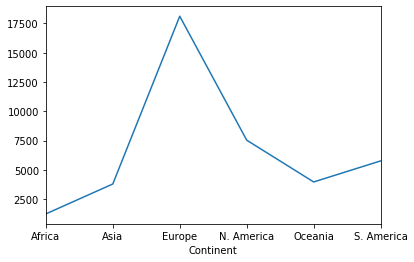

In [126]:
df.groupby(by='Continent').GDP_per_capita.median().plot()

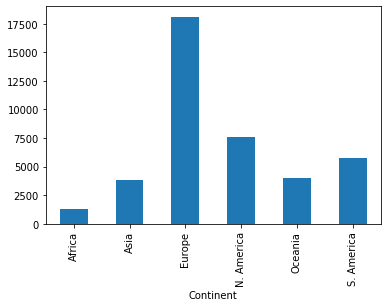

In [127]:
df.groupby(by='Continent').GDP_per_capita.median().plot(kind='bar')

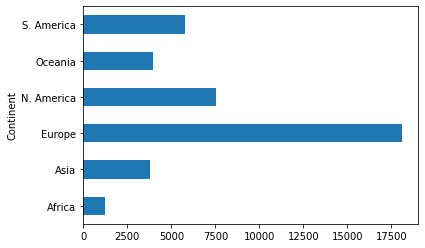

In [128]:
df.groupby(by='Continent').GDP_per_capita.median().plot(kind='barh')

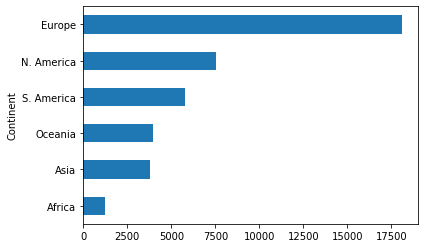

In [130]:
df.groupby(by='Continent').GDP_per_capita.median().sort_values(ascending=True).plot(kind='barh')

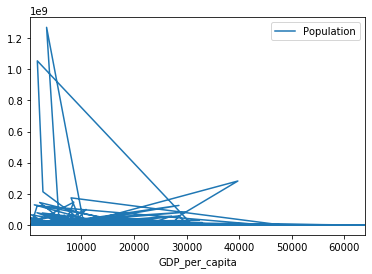

In [131]:
df.plot(x='GDP_per_capita', y= 'Population')

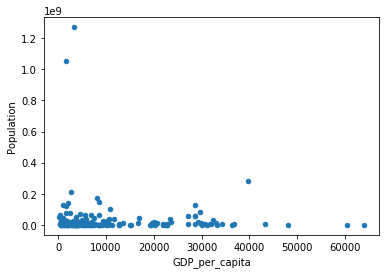

In [132]:
df.plot(x='GDP_per_capita', y= 'Population', kind='scatter')